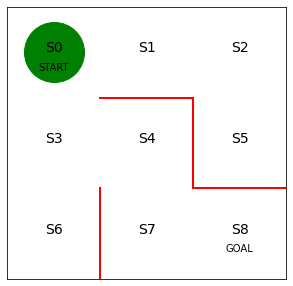

In [1]:

# 구현에 사용할 패키지 임포트하기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 붉은 벽 그리기
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정

# 줄은 상태 0~7, 열은 행동방향(상,우,하,좌 순)를 나타낸다.
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8은 목표지점이므로 정책이 없다
                    ])

In [3]:
(a,b)=theta_0.shape
random_matrix=np.random.rand(a,b)
print(random_matrix)
Q=random_matrix*theta_0

[[0.84019573 0.31589562 0.42344342 0.42964356]
 [0.80533021 0.88982522 0.55175516 0.51738375]
 [0.72857714 0.96201394 0.90162382 0.928317  ]
 [0.59861082 0.80221782 0.64931787 0.77867869]
 [0.74555214 0.3171921  0.72204071 0.85953901]
 [0.09531287 0.89397278 0.8993404  0.77200657]
 [0.71559148 0.43444035 0.47168576 0.18313309]
 [0.50764502 0.73678297 0.5346392  0.98430973]]


In [4]:
print(Q)

[[       nan 0.31589562 0.42344342        nan]
 [       nan 0.88982522        nan 0.51738375]
 [       nan        nan 0.90162382 0.928317  ]
 [0.59861082 0.80221782 0.64931787        nan]
 [       nan        nan 0.72204071 0.85953901]
 [0.09531287        nan        nan        nan]
 [0.71559148        nan        nan        nan]
 [0.50764502 0.73678297        nan        nan]]


In [6]:
def simple_convert_pi_from_theta(theta):
    m,n=theta.shape
    pi=np.zeros((m,n))
    for i in range(m):
        pi[i][:]=theta[i][:]/np.nansum(theta[i][:])
    pi=np.nan_to_num(pi)
    return pi


In [7]:
def Sarsa(s,a,r,s_next,a_next,Q,eta,gamma):
    if s_next==8:
        Q[s,a]=Q[s,a]+eta*(r-Q[s,a])
    else :
        Q[s,a]=Q[s,a]+eta*(r+gamma*Q[s_next,a_next]-Q[s,a])
    return Q


In [8]:
def get_action(s,Q,epsilon,pi_0):
    direction=["up","right","down","left"]
    if np.random.rand()<epsilon:
        next_direction=np.random.choice(direction,p=pi_0[s,:])
    else:
        next_direction=direction[np.nanargmax(Q[s,:])]
    
    if next_direction == "up":
        action=0
    elif next_direction == "right":
        action=1
    elif next_direction == "down":
        action=2
    elif next_direction == "left":
        action=3
    return action

In [9]:
def get_s_next(s,a,Q,epsilion,pi_0):
    direction=["up","right","down","left"]
    next_direction=direction[a]
    if next_direction == "up":
        s_next=s-3
    elif next_direction == "right":
        s_next=s+1
    elif next_direction == "down":
        s_next=s+3
    elif next_direction == "left":
        s_next=s-1
    return s_next

In [10]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0  # 시작 지점
    a = a_next = get_action(s, Q, epsilon, pi)  # 첫 번째 행동
    s_a_history = [[0, np.nan]]  # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트

    while (1):  # 목표 지점에 이를 때까지 반복
        a = a_next  # 행동 결정

        s_a_history[-1][1] = a
        # 현재 상태(마지막이므로 인덱스가 -1)을 히스토리에 추가

        s_next = get_s_next(s, a, Q, epsilon, pi)
        # 다음 단계의 상태를 구함

        s_a_history.append([s_next, np.nan])
        # 다음 상태를 히스토리에 추가, 행동은 아직 알 수 없으므로 nan으로 둔다

        # 보상을 부여하고 다음 행동을 계산함
        if s_next == 8:
            r = 1  # 목표 지점에 도달했다면 보상을 부여
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 다음 행동 a_next를 계산

        # 가치함수를 수정
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

        # 종료 여부 판정
        if s_next == 8:  # 목표 지점에 도달하면 종료
            break
        else:
            s = s_next

    return [s_a_history, Q]


In [13]:
eta = 0.1  # 학습률
gamma = 0.9  # 시간할인율
epsilon = 0.5  # ε-greedy 알고리즘 epsilon 초깃값
#v = np.nanmax(Q, axis=1)  # 각 상태마다 가치의 최댓값을 계산
is_continue = True
episode = 1
pi_0=simple_convert_pi_from_theta(theta_0)
while is_continue:  # is_continue의 값이 False가 될 때까지 반복
    print("에피소드: " + str(episode))

    # ε 값을 조금씩 감소시킴
    epsilon = epsilon / 2

    # Sarsa 알고리즘으로 미로를 빠져나온 후, 결과로 나온 행동 히스토리와 Q값을 변수에 저장
    s_a_history, Q = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    # 상태가치의 변화
    #new_v = np.nanmax(Q, axis=1)  # 각 상태마다 행동가치의 최댓값을 계산
    #print(new_v)
    #print(np.sum(np.abs(new_v - v)))  # 상태가치 함수의 변화를 출력
   # v = new_v

    print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

    # 100 에피소드 반복
    episode = episode + 1
    if episode > 100:
        break

에피소드: 1
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
에피소드: 2
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 3
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 4
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 5
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 6
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 7
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 8
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 9
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 10
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 11
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 12
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 13
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 14
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 15
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 16
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 17
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 18
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 19
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 20
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 21
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 22
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 23
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 24
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 25
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 26
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 27
목표 지점에 이르기까지